In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [6]:
df_train = pd.read_csv("/Users/adam/desktop/Learn_AI/ML100Days/Titanic_train.csv")
df_test = pd.read_csv("/Users/adam/desktop/Learn_AI/ML100Days/Titanic_test.csv")

#看測試資料與訓練資料變數有沒有差別
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [7]:
#有無遺漏值
print(df_test.isnull().any())

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


TypeError: unsupported operand type(s) for -: 'str' and 'float'

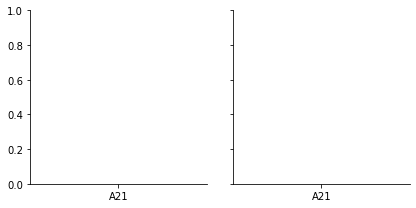

In [11]:
# Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，我們以cabin 為例，進行，由後往前補
# 補值前


# 連續型用分布圖行來看
g = sns.FacetGrid(df_test, col='Sex')
g.map(sns.histplot, 'Cabin', kde=False)

#補值後
df_test['Cabin']=df_test['Cabin'].fillna(method='bfill')
df_test[df_train['Cabin'].isnull().values==True]


g = sns.FacetGrid(df_train, col="Sex")
g.map(sns.histplot, 'Cabin', kde=False)